### Imports, global variable declarations and other high-level configs

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import config
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os


Avoid running the following cell repeatedly because it might require re-scrapping the data. Running the following block once is enough.

In [18]:
stop_words = set(stopwords.words('english'))
companies = config.companies_of_interest
df = pd.DataFrame()
yahoo_results = []

# create the folder if it does not exist
if not os.path.exists('Visualizations'):
    os.makedirs('Visualizations')

### The following cell collects data from Yahoo news about our companies
Warning: don't run this block repeatedly, you'll risk getting your IP blocked.

In [19]:
for company in companies:
    yahoo_url = f"https://news.search.yahoo.com/search?p={company}"
    yahoo_response = requests.get(yahoo_url)
    yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

    yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
    yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

    for i in range(len(yahoo_titles)):
        title = yahoo_titles[i].text.strip()
        summary = yahoo_summaries[i].text.strip()
        yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News", "company": company})

    # Create dataframe
    results = yahoo_results 
    df = pd.DataFrame(results)

    print(f"Search results for {company}:")
    print(df.head())
    print("--------------------------")

Search results for Twitter:
                                               title  \
0  16 Royally Funny Tweets And Memes About King C...   
1  You’ll Never Walk Alone performance at Coronat...   
2  New Twitter rules expose election offices to s...   
3  NBA Twitter reacts to Sixers beating Celtics i...   
4  Tom Cruise, Patrick Mahomes among celebrities ...   

                                             summary      source  company  
0  King Charles's coronation somehow ended up bei...  Yahoo News  Twitter  
1  The song has a close link to Liverpool footbal...  Yahoo News  Twitter  
2  The election commission applied weeks ago for ...  Yahoo News  Twitter  
3  James Harden was clutch down the stretch for t...  Yahoo News  Twitter  
4  Rapper and producer will.i.am conducted an orc...  Yahoo News  Twitter  
--------------------------
Search results for Ebix:
                                               title  \
0  16 Royally Funny Tweets And Memes About King C...   
1  You’ll Never

Dataframe information

In [36]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    98 non-null     object
 1   summary  98 non-null     object
 2   source   98 non-null     object
 3   company  98 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


,title,summary,source,company
count,98,98,98,98
unique,88,88,1,9
top,"‘Fight with us’: KC medical students, doctors ...",Kansas City area medical students held a Satur...,Yahoo News,Block
freq,2,2,98,20


### Visualizations of data scrapped from Yahoo News

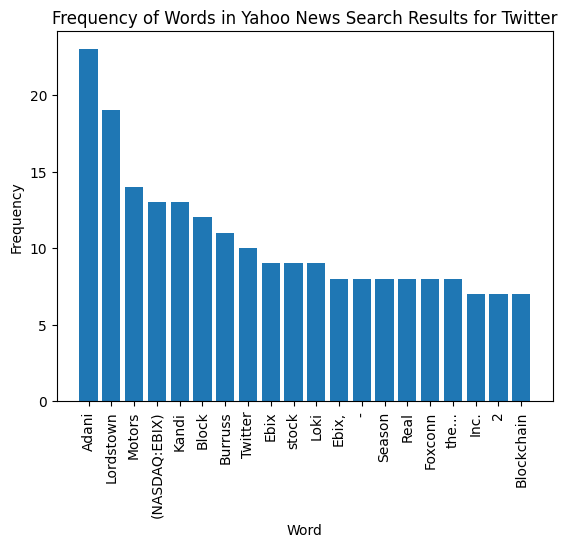

------


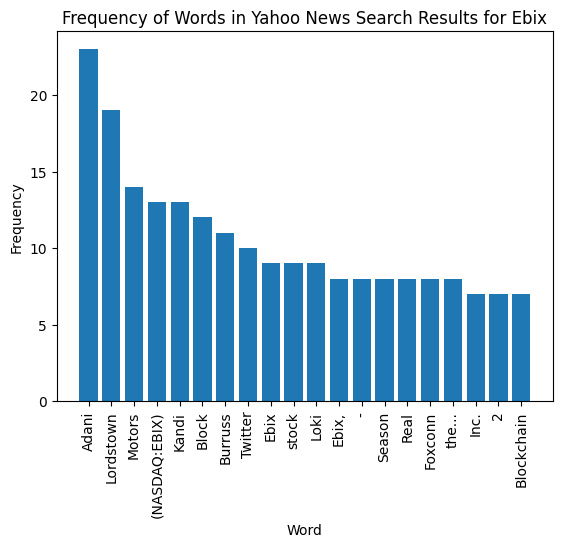

------


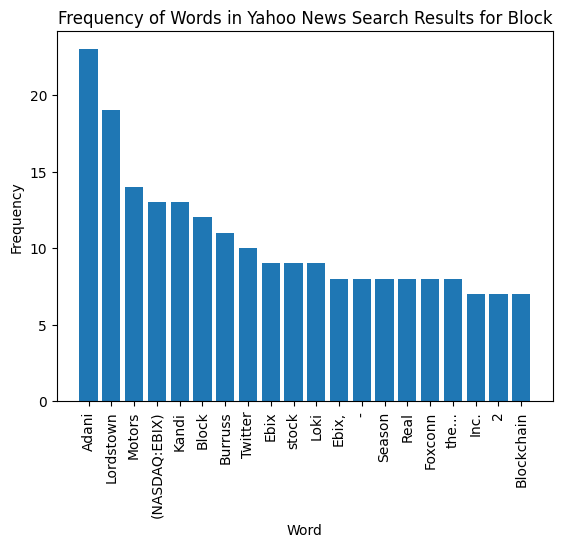

------


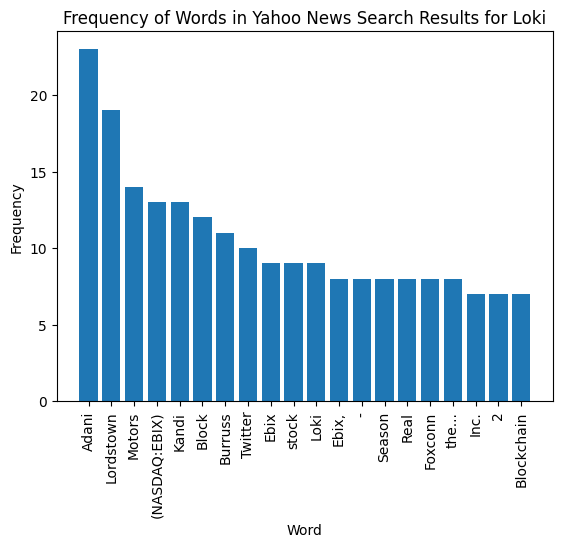

------


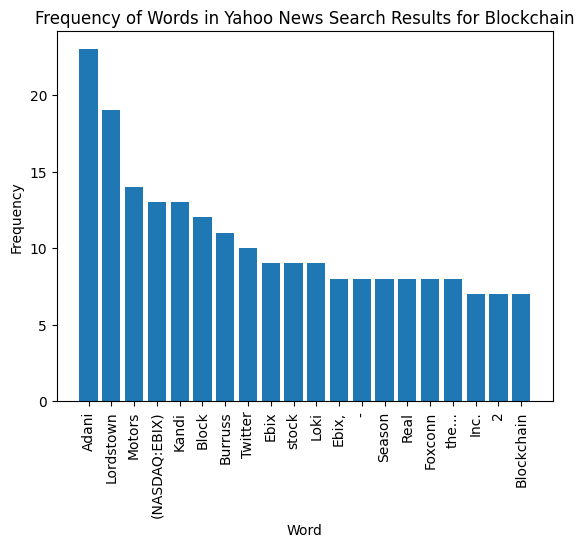

------


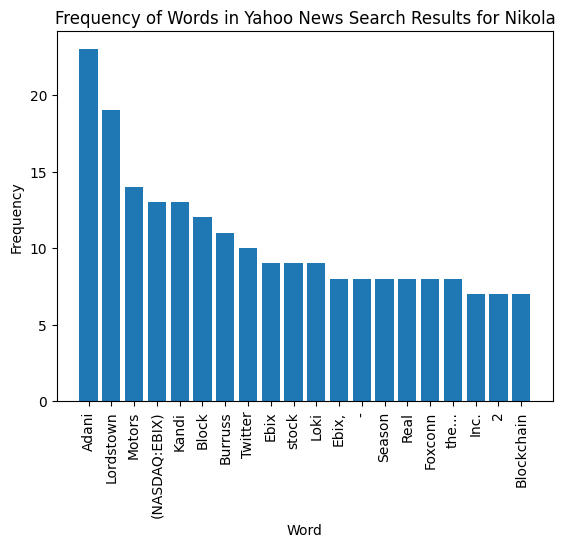

------


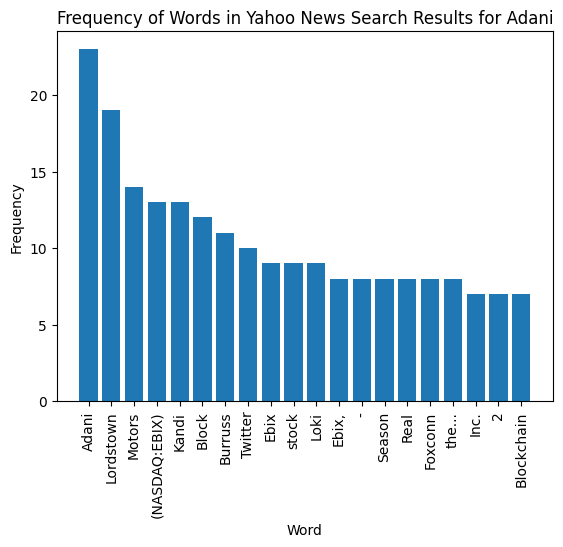

------


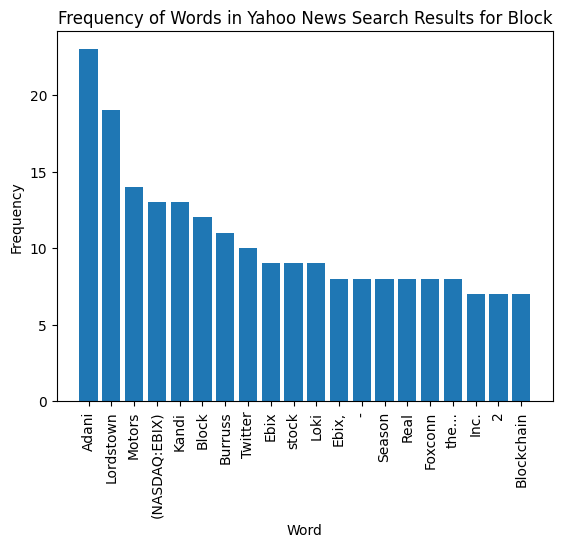

------


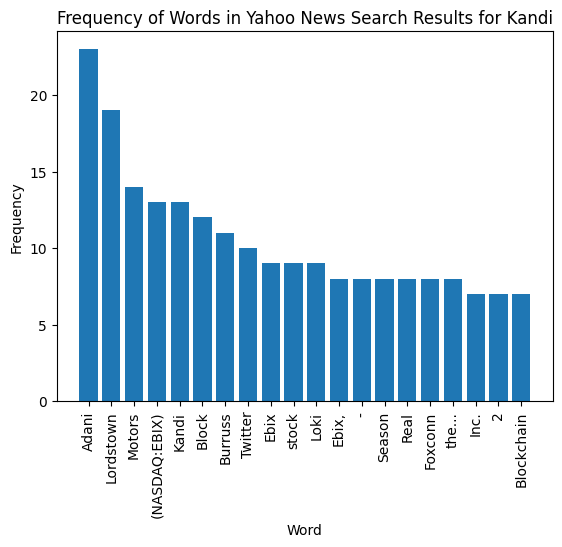

------


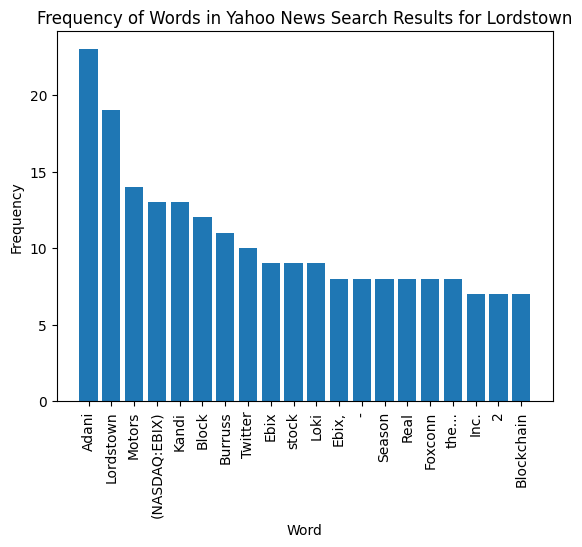

------


In [37]:
for company in companies:
    # Filter the DataFrame for the current company
    df_company = df[df["company"] == company]

    # Join all titles and summaries into a single string
    text = " ".join(df_company["title"].tolist() + df_company["summary"].tolist())

    # Split the text into individual words
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    # Count the frequency of each word
    word_counts = Counter(words)

    # Create a bar chart of the 20 most common words
    most_common_words = word_counts.most_common(20)
    x = [word[0] for word in most_common_words]
    y = [word[1] for word in most_common_words]
    plt.bar(x, y)
    plt.title(f"Frequency of Words in Yahoo News Search Results for {company}")
    plt.xlabel("Word")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    # plt.savefig(f"v-Word Frequency-YN-{company}.png", dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join('Visualizations', f"Word Frequency-YN-{company}.png"), dpi=300, bbox_inches='tight')
    plt.show()
    print("------")

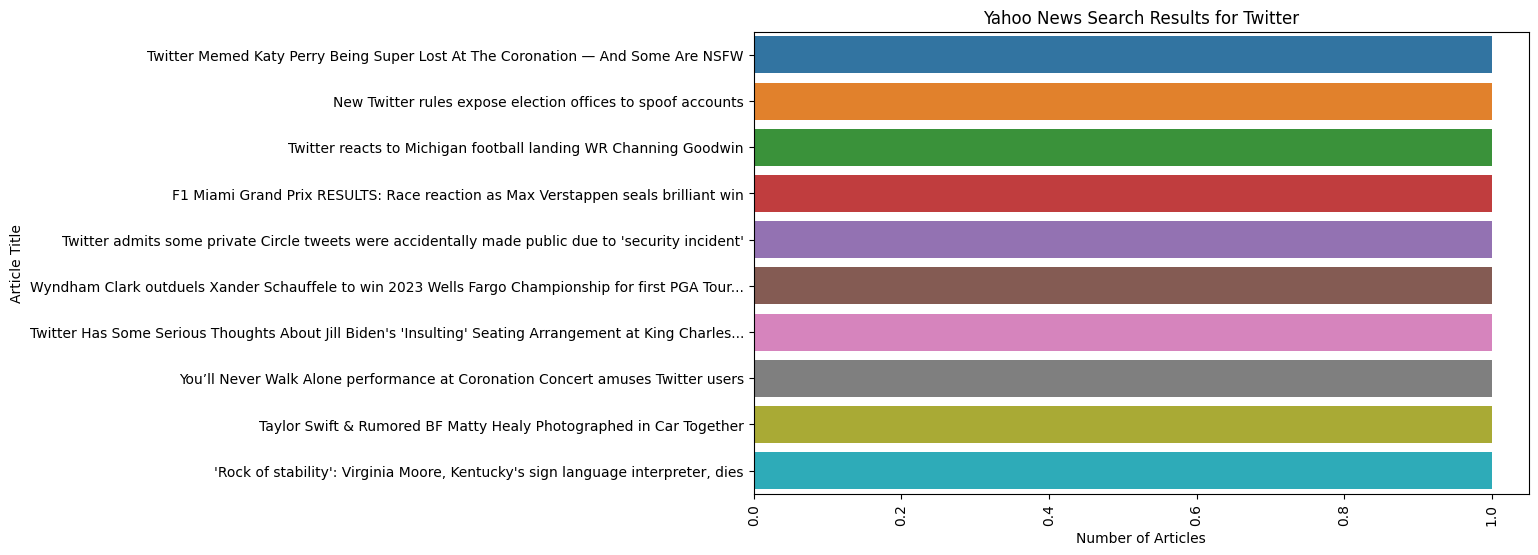

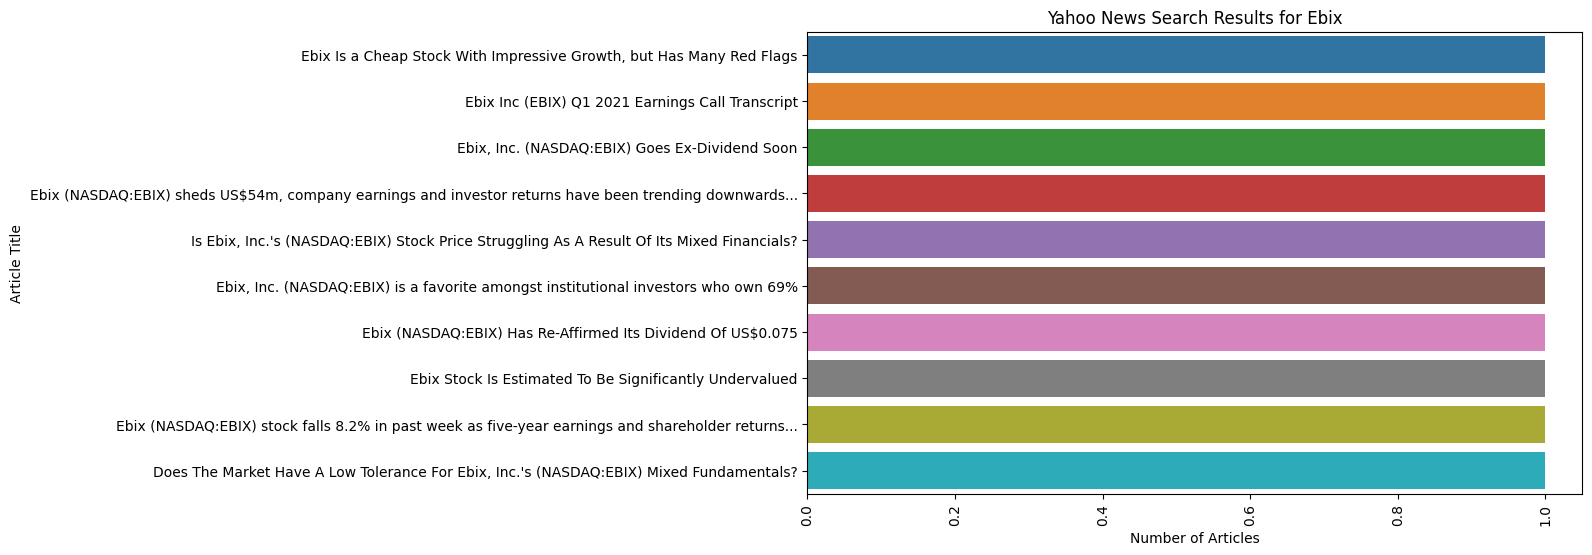

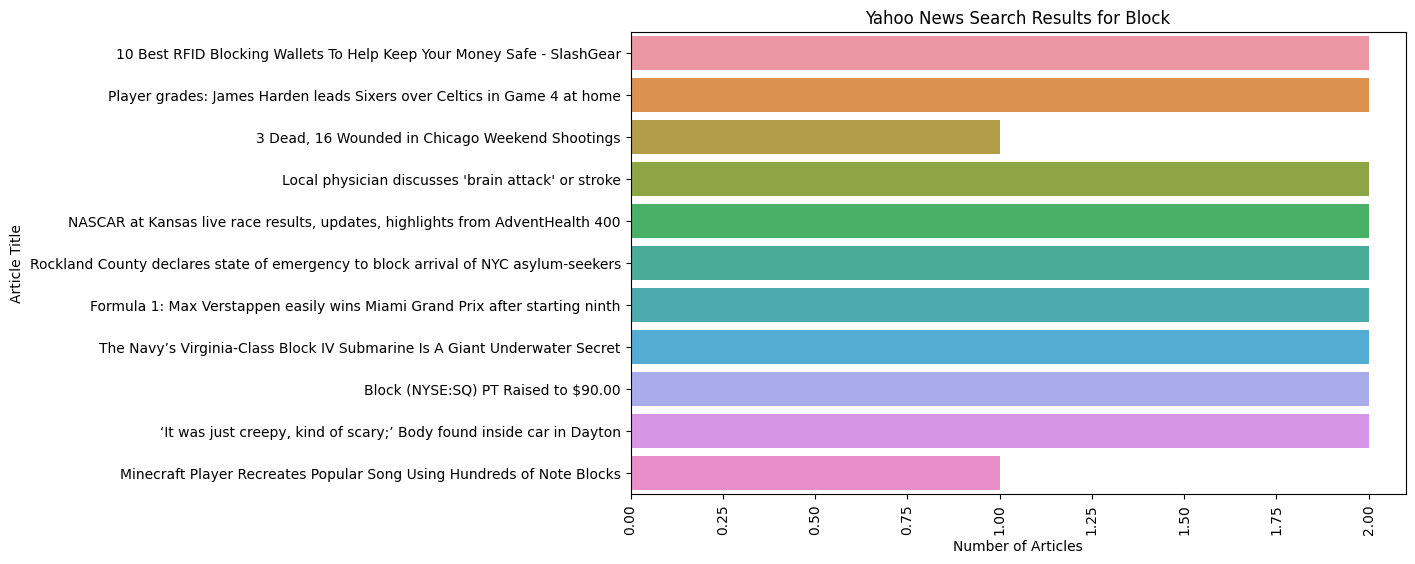

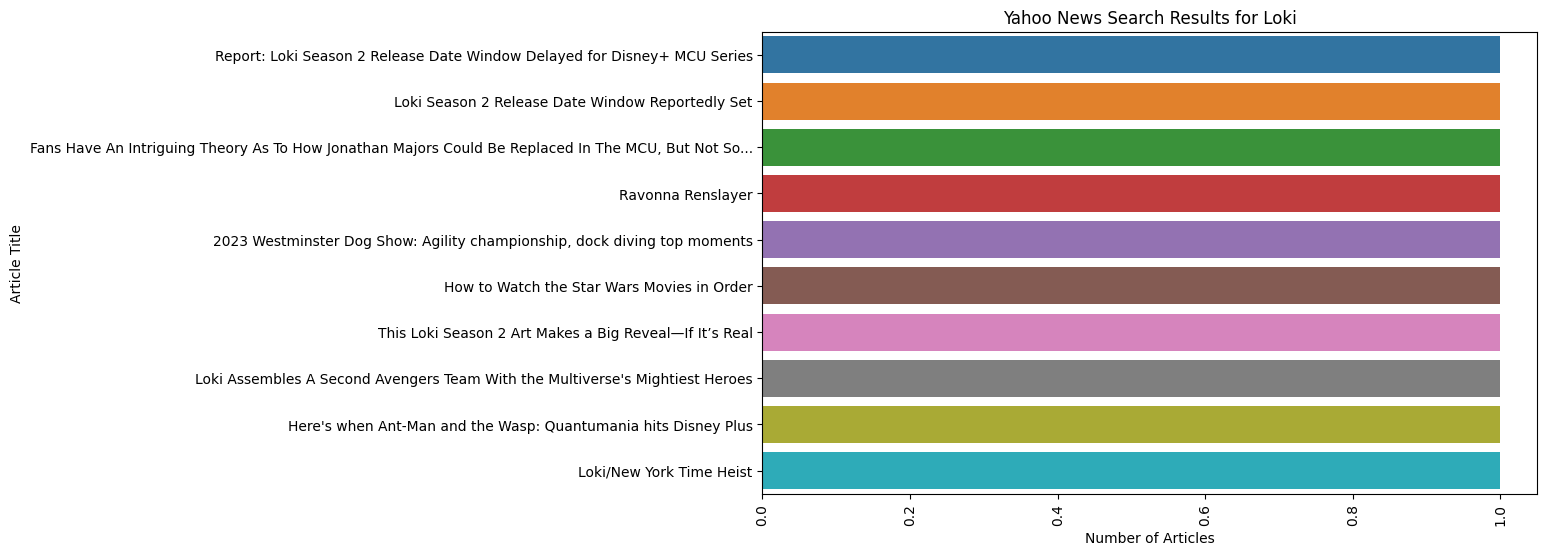

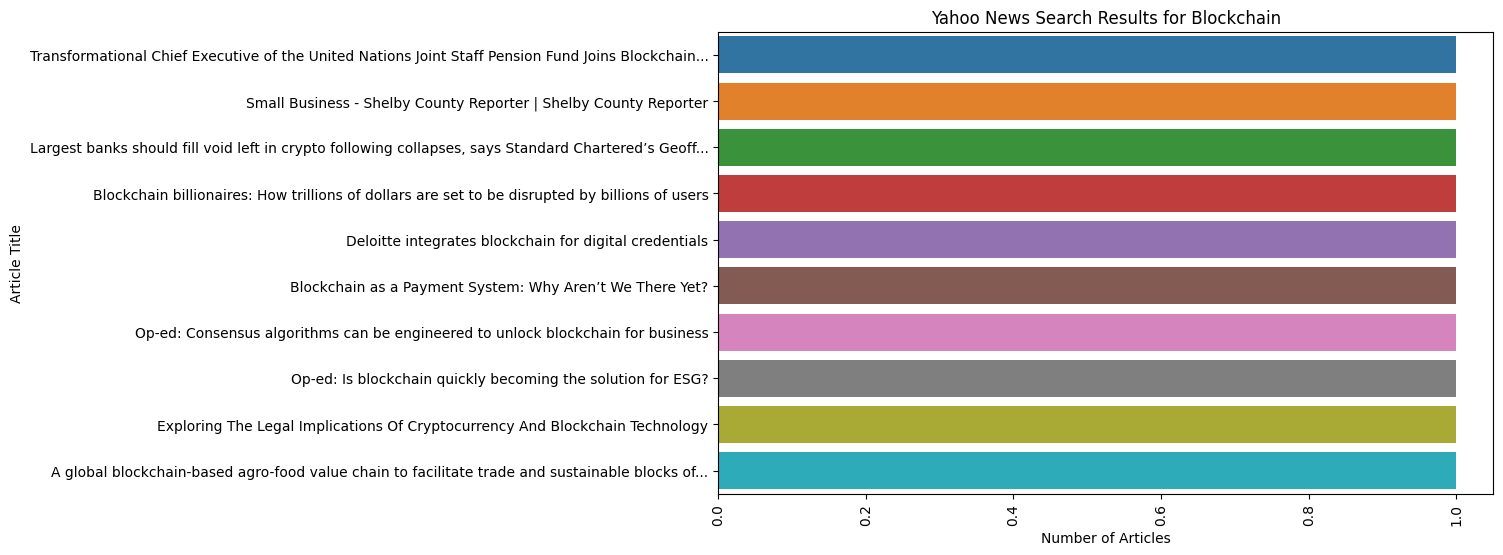

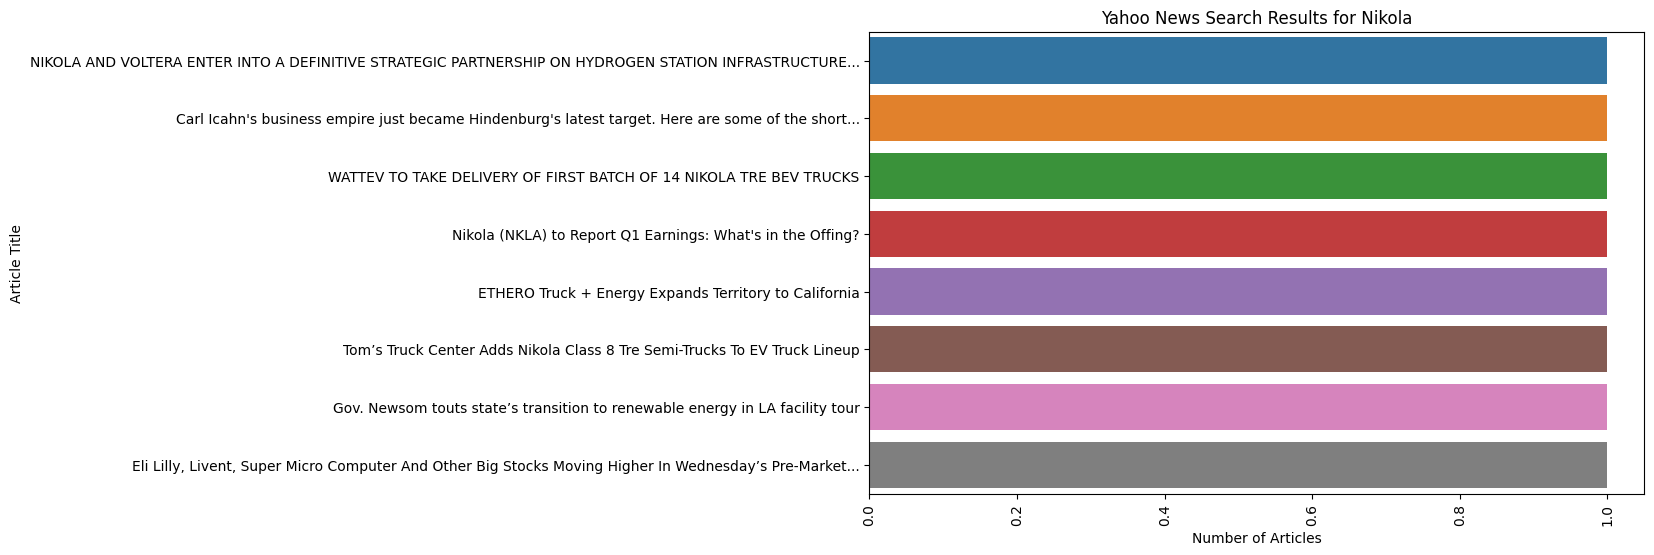

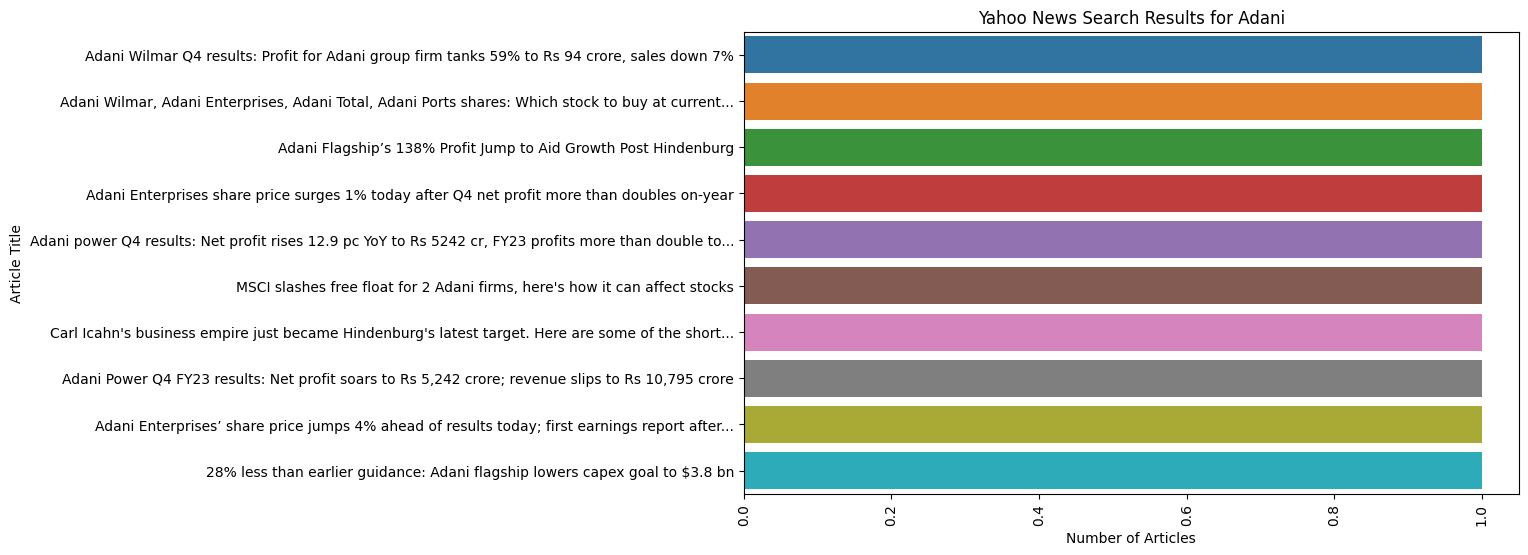

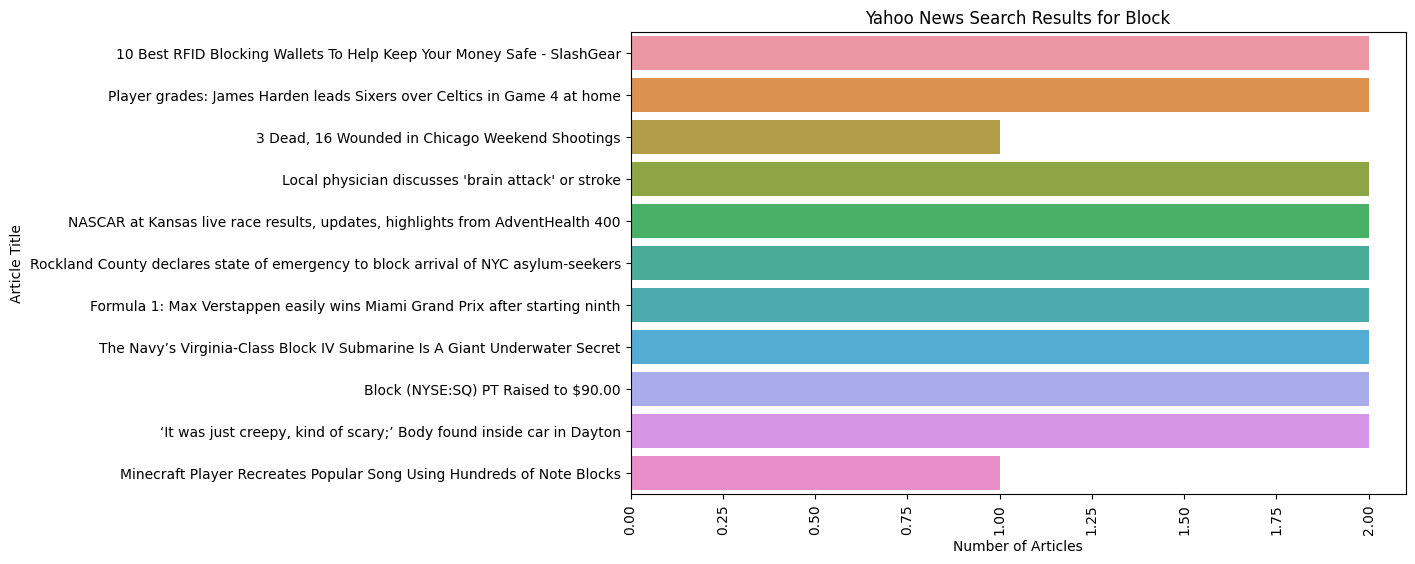

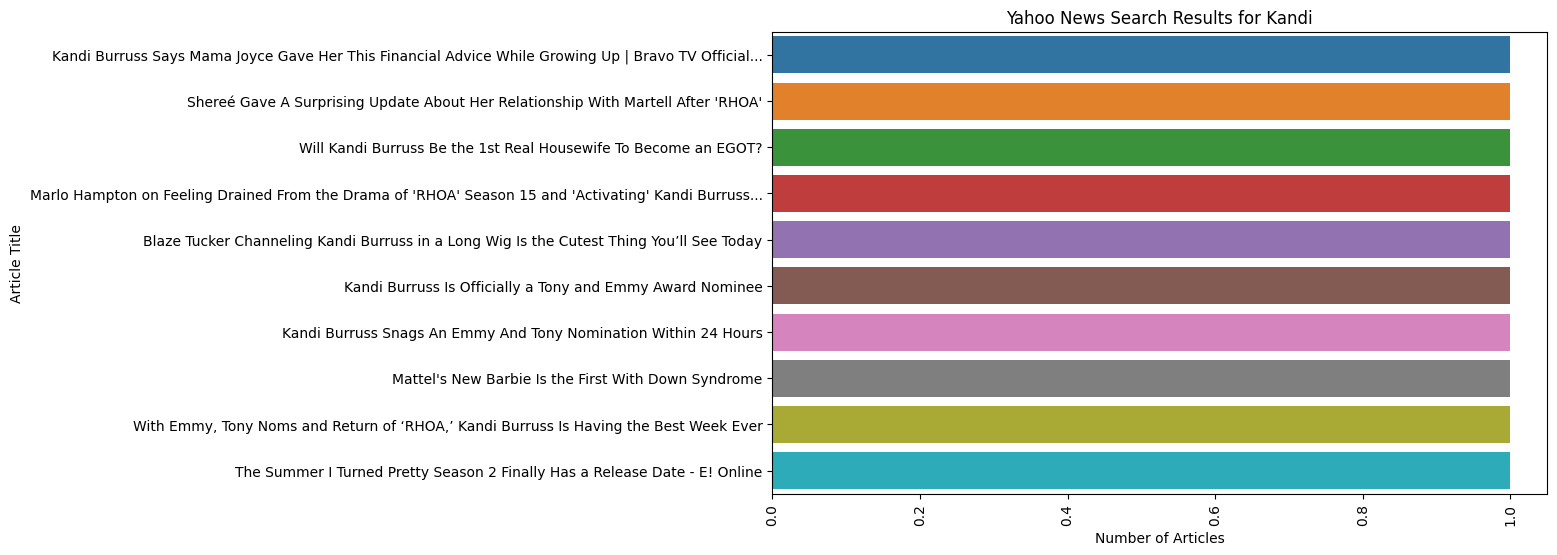

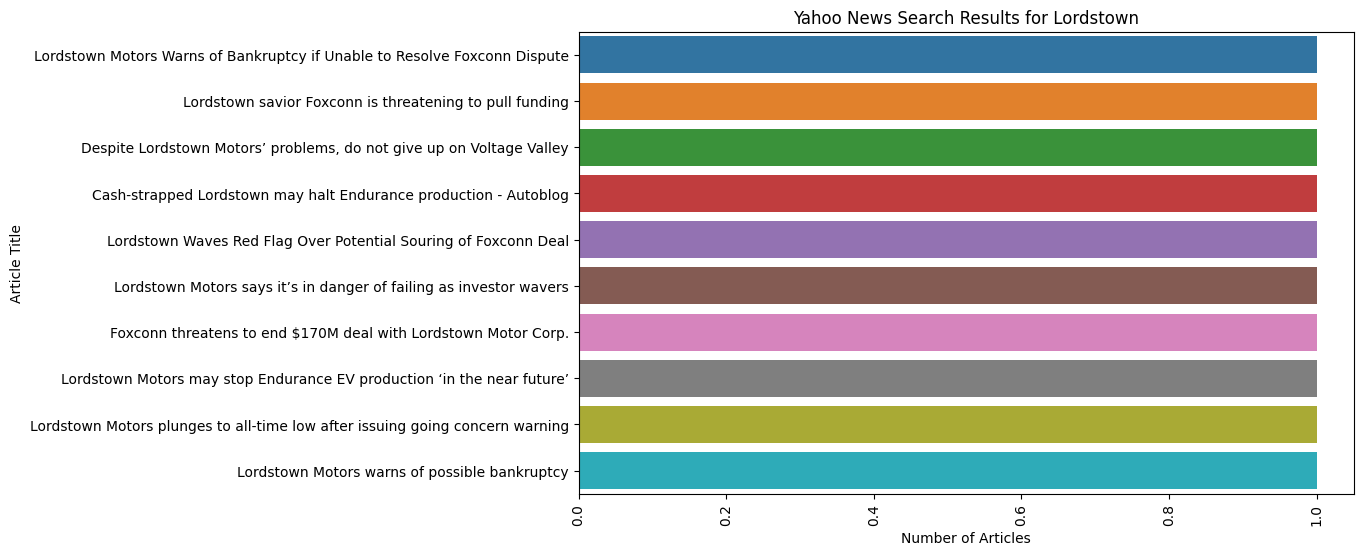

In [14]:
for company in companies:
    # Filter the data for the specific company
    company_data = df[df['company'] == company]

    # Data visualization
    plt.figure(figsize=(10, 6))
    sns.countplot(y="title", data=company_data)
    plt.xlabel("Number of Articles")
    plt.ylabel("Article Title")
    plt.title(f"Yahoo News Article Count Frequency for {company}")
    plt.xticks(rotation=90)
    plt.savefig(f"v-Article Count Frequency-YN-{company}.png", dpi=300, bbox_inches='tight')
    plt.show()


Surya's cell

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of companies
companies = ["nikola", "adani", "block", "kandi", "lordstown"]

for company in companies:
    search_term = company
    # Get user input for the URL
    url = f'https://hindenburgresearch.com/{search_term}'
    response = requests.get(url)
    # Send a GET request to the URL and parse the HTML content
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract all headers and their related paragraphs
    headers = {}
    current_header = None
    for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
        if element.name.startswith('h'):
            # If a new header is found, update the current header
            current_header = element.text.strip()
            headers[current_header] = []
        elif current_header is not None:
            # If a paragraph is found, add it to the list of paragraphs for the current header
            headers[current_header].append(element.text.strip())

    # Create a list of dictionaries with the title, summary and source information
    data = []
    for header, paragraphs in headers.items():
        data.append({
            'title': header,
            'summary': ' '.join(paragraphs),
            'source': url
        })

    # Create a dataframe from the list of dictionaries
    df = pd.DataFrame(data)

    # Print the dataframe
    print(f"Search results for {company.capitalize()}:")
    print(df)
    print("\n")

default cell

In [ ]:
search_term = input("Enter a search term: ")
# Get user input for the URL
url = f'https://hindenburgresearch.com/{search_term}'
# response = requests.get(url)
# Send a GET request to the URL and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract all headers and their related paragraphs
headers = {}
current_header = None
for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
    if element.name.startswith('h'):
        # If a new header is found, update the current header
        current_header = element.text.strip()
        headers[current_header] = []
    elif current_header is not None:
        # If a paragraph is found, add it to the list of paragraphs for the current header
        headers[current_header].append(element.text.strip())

# Create a list of dictionaries with the title, summary and source information
data = []
for header, paragraphs in headers.items():
    data.append({
        'title': header,
        'summary': ' '.join(paragraphs),
        'source': url
    })

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)

# Print the dataframe
print(df)


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()

In [ ]:
text = " ".join(df["title"].tolist() + df["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['summary'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['title'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_1

In [ ]:
df

In [ ]:
result = pd.concat([df_1, df], ignore_index=True)

In [ ]:
result.head()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine the 'title' and 'summary' columns into one
text = ' '.join(result['title']) + ' ' + ' '.join(result['summary'])

# Generate a word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud for the title column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'])))
plt.axis('off')
plt.title('Word Cloud for Title Column')
plt.show()

# Plot the word cloud for the summary column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary'])))
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title'].tolist() + result['summary'].tolist())

# Remove stop words
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get stop words and set up punctuation filter
punctuation = set(string.punctuation)
extra_symbols = set(['‘', '’', '“', '”', '’s', '’t', '—', '–', '...'])

# Remove stop words and extra symbols from title column
result['title_clean'] = result['title'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))

# Remove stop words and extra symbols from summary column
result['summary_clean'] = result['summary'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))


## Results

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title_clean'].tolist() + result['summary_clean'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_summary_words = [word for title in result['summary_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_summary_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in summary column')
plt.xlabel('Frequency')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

title_lengths = result['title_clean'].str.len()
summary_lengths = result['summary_clean'].str.len()

fig, ax = plt.subplots()
ax.scatter(title_lengths, summary_lengths)
plt.title('Title vs. Summary Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Summary Length (Characters)')
plt.show()


In [ ]:
# Print the info() method
print(df_1.info())

In [ ]:
# Print the describe() method
print(df_1.describe())

In [ ]:
# Print the head() method
print(df_1.head())

In [ ]:
# Print the tail() method
print(df_1.tail())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

result['length'] = result['title_clean'].str.len() + result['summary_clean'].str.len()
df_1['length'] = df_1['summary'].apply(len)
sns.barplot(x=df_1.index, y='length', data=df_1)
plt.title('Length of Articles')
plt.xlabel('Article Index')
plt.xticks(rotation=90)
plt.ylabel('Length (Characters)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

source_counts = result['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sources of Articles')
plt.show()


In [ ]:
result.head()

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores


In [ ]:
df_1['title_sentiment'] = df_1['title'].apply(get_sentiment_scores)
df_1['summary_sentiment'] = df_1['summary'].apply(get_sentiment_scores)


In [ ]:
title_sentiment_avg = df_1['title_sentiment'].apply(lambda x: x['compound']).mean()
summary_sentiment_avg = df_1['summary_sentiment'].apply(lambda x: x['compound']).mean()

print("Title sentiment average:", title_sentiment_avg)
print("Summary sentiment average:", summary_sentiment_avg)
